# Ejercicios sobre splines y suavizado mediante Kernel

Estos ejercicios están al final de los notebooks de `Polinomios_splines_V2` y `Smoothed Kernels`

1. El conjunto de datos `wage` contiene una serie de otras características que no se han explorado, como el estado civil (maritl), la clase de trabajo (jobclass) y otras. Explore las relaciones entre algunos de estos otros predictores y el salario, y utilice técnicas de ajuste no lineal para ajustar modelos flexibles a los datos. Cree gráficos de los resultados obtenidos y escriba un resumen de sus hallazgos.

2. Explore de nuevo los splines (no suavizados) para regresiones con múltiples variables. Use al menos dos predictores, siendo al menos uno categórico (diferente a jobclass) y observe como varia el RMSE.

3. Para el dataset de `wage` (salario), y usando como variable independiente `age`. Realice procesos de suavizado involucrando kernels (pruebe con los tres kernels vistos) y también realice una regresión local usando el kernel de epanechinov.  Para este ejercicio no es necesario usar la división de training y test.

4. Cree una nueva clase binaria, en donde una clase corresponda a los salarios mayores a 250 y la otra a los menores. Realice una clasificación usando el clasificador de Naive Bayes. Pruebe el resultado con un Test set y con la métrica de acuracy y la matriz de confusión.

## Hacer solo el tercer y cuarto punto.
# Tarea 3
### Víctor Samuel Pérez Díaz y Nicolás Duque Báez

In [254]:
# Cargamos las librerias

import numpy as np
from numpy.random import uniform
from numpy.random import normal

import pandas as pd

from scipy.stats import norm

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

# 3 PUNTO
## Suavizado mediante Kernel en 1D

In [94]:
df = pd.read_csv('wage.csv')
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [95]:
X = df['age']
Y = df['wage']

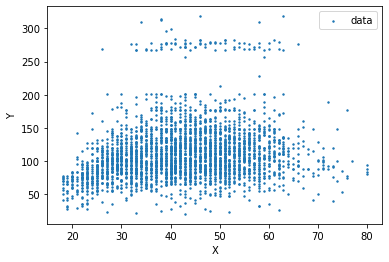

In [96]:
# plt.plot(x_real, y_real, c='r', label='real')
plt.scatter(X, Y, s=2, label='data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

### Tomaremos como curva real el spline suavizado:

In [97]:
from csaps import csaps

In [98]:
wage2 = df.sort_values("age").groupby("age")["wage"].median().reset_index()
wage2.head()

,age,wage
0,18,69.619037
1,19,54.598150
2,20,71.482747
3,21,72.150456
4,22,75.043154


In [99]:
sp = csaps(xdata=wage2.age, ydata=wage2.wage, smooth=0.1) # Ajusta el modelo de smooth spline
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)
pred_smooth_sp = sp(age_grid) # prediccion sobre nuevos valores de edad (un grid)

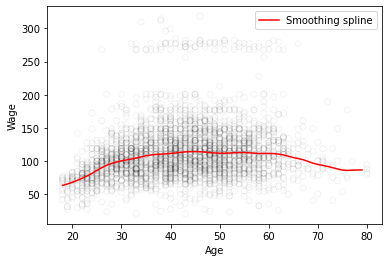

In [100]:
# Grafica el spline suavizado
plt.plot(age_grid, pred_smooth_sp, color='r', label='Smoothing spline')
plt.legend()
plt.scatter(df['age'], df['wage'], facecolor='None', edgecolor='k', alpha=0.05)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

In [208]:
x_real = age_grid
y_real = pred_smooth_sp

Construimos tres kernels: 
- KNN, 
- Epanechnikov: $D(t)=\left\{\begin{array}{cl}\frac{3}{4}\left(1-t^{2}\right) & \text { if }|t| \leq 1 \\ 0 & \text { otherwise }\end{array}\right.$
- Tricúbico:  $D(t)=\left\{\begin{array}{cl}\left(1-|t|^{3}\right)^{3} & \text { if }|t| \leq 1 \\ 0 & \text { otherwise }\end{array}\right.$

y ponderamos mediante Nadaraya-Watson:
$$K_{\lambda}\left(x_{0}, x\right)=D\left(\frac{\left|x-x_{0}\right|}{h_{\lambda}\left(x_{0}\right)}\right)$$
$$\hat{f}\left(x_{0}\right)=\frac{\sum_{i=1}^{N} K_{\lambda}\left(x_{0}, x_{i}\right) y_{i}}{\sum_{i=1}^{N} K_{\lambda}\left(x_{0}, x_{i}\right)}$$

In [102]:
y_hat_30_nearest = np.zeros(y_real.shape)
y_hat_02_epa = np.zeros(y_real.shape)
y_hat_02_tri = np.zeros(y_real.shape)
for i in range(x_real.shape[0]):
    x0 = x_real[i]
    y_hat_30_nearest[i] = np.mean(Y[np.argsort(np.abs(X - x0))][:30])
    
    t = np.abs(X - x0)/0.2
    d = (t<=1)*3/4*(1-t**2) # kernel de Epanechnikov 
    d3 = (t<=1)*(1-t**3)**3 # kernel tricubico
    
    # Ponderacion mediante kernel Nadaraya-Watson
    y_hat_02_epa[i] = np.sum(d*Y)/np.sum(d)
    y_hat_02_tri[i] = np.sum(d3*Y)/np.sum(d3)

<ipython-input-102-4e7092abdf0b>:13: RuntimeWarning: invalid value encountered in double_scalars
  y_hat_02_epa[i] = np.sum(d*Y)/np.sum(d)
<ipython-input-102-4e7092abdf0b>:14: RuntimeWarning: invalid value encountered in double_scalars
  y_hat_02_tri[i] = np.sum(d3*Y)/np.sum(d3)


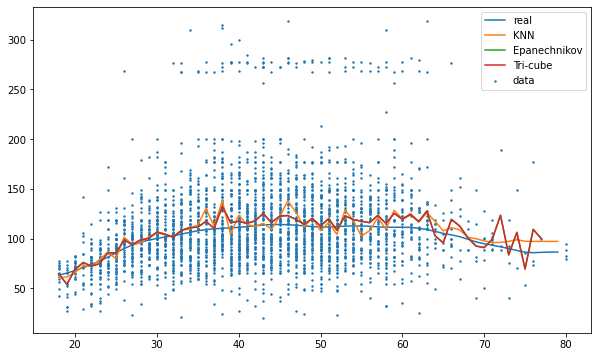

In [103]:
plt.figure(figsize=(10,6))
plt.plot(x_real, y_real, label='real')
plt.scatter(X, Y, s=2, label='data')
plt.plot(x_real, y_hat_30_nearest, label='KNN')
plt.plot(x_real, y_hat_02_epa, label='Epanechnikov')
plt.plot(x_real, y_hat_02_tri, label='Tri-cube')
plt.legend();

### Regresión local

In [209]:
X_test = x_real

Precaución: el siguiente bloque tiene un tiempo de ejecución alto.

In [210]:
y_hat_lin = np.zeros(X_test.shape[0])

B = np.hstack((np.ones(shape=(X.shape[0], 1)), np.expand_dims(X, axis=1)))

for i in range(X_test.shape[0]):
    x0 = X_test[i]
    t = np.abs(X - x0)/0.2
    d = (t<=1)*3/4*(1-t**2) # Epanechnikov
    Wx0 = np.diag(d)  
    y_hat_lin[i] = np.array([1, x0]) @ np.linalg.pinv(B.T @ Wx0 @ B) @ B.T @ Wx0 @ np.expand_dims(Y, axis=1)

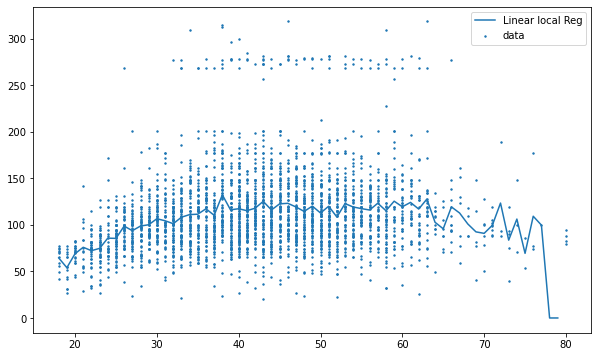

In [213]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, s=2, label='data')
plt.plot(X_test, y_hat_lin, label='Linear local Reg')
plt.legend();

# PUNTO 4
## Naive Bayes Classifier

In [256]:
X = df.drop(columns = ['wage','logwage'])
Y = 1*(df['wage']>250)

In [257]:
X = pd.get_dummies(X,drop_first=True)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [259]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [263]:
print("El accuracy de clasificación con el clasificador de NB es:", clf.score(X_test, y_test))

El accuracy de clasificación con el clasificador de NB es: 0.296


Text(33.0, 0.5, 'True')

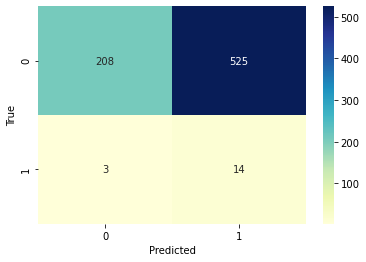

In [264]:
sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)), annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')